<a href="https://www.kaggle.com/code/caitlinmalloch/cheese-the-day-ml-final-project?scriptVersionId=165205134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cheese the Day: A Brie-lliant Canadian Cheese Machine Learning Final Project

## Author: Caitlin Malloch, Winter 2024

## UBC Key Capabilities in Data Science Certificate | Introduction to Machine Learning | FS031W23P

## Introduction

Cheese production and consumption are significant in many cultures worldwide, including Canada. Understanding the characteristics and qualities of different types of Canadian cheeses is not only of interest to cheese enthusiasts but also has practical applications in the dairy industry and culinary arts. In this project, I'll aim to analyze a dataset containing information about various Canadian cheeses to gain insights into their characteristics and classifications using machine learning.

### Goal
The goal of this project is to utilize machine learning techniques to analyze the dataset and develop models that can classify cheeses based on their characteristics, such as moisture content, flavor profiles, and milk types.

### Specific Question
Can we predict the type or characteristics of a Canadian cheese based on its properties listed in the dataset?

### Expected Outcomes
By the end of this project, I expect to have developed machine learning models that can accurately classify Canadian cheeses based on their attributes. Additionally, I want to gain insights into the most influential features for cheese classification, providing valuable information for cheese producers and enthusiasts.

### Significance
This project is significant as it demonstrates the application of machine learning in the analysis of food-related datasets. The ability to classify cheeses based on their properties can have implications for quality control in the dairy industry and can also provide insights for culinary professionals and cheese aficionados.

### Machine Learning Context
This project falls under the category of supervised machine learning, specifically classification, where we aim to categorize cheeses into different types or classes based on their attributes.


## Exploratory Data Analysis (EDA)
In this section, I will explore the canadianCheeseDirectory.csv dataset to gain a better understanding of its structure and contents. I will perform various analyses to identify patterns, trends, and potential issues in the data.


Since there are two datasets I will use in this project, let's load canadianCheeseDirectory.csv first. 

### Reading the Data
Let's start by loading the dataset into a pandas DataFrame and examining the first few rows:

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/canadiancheesedirectory/canadianCheeseDirectory.csv')

# Display the first few rows of the dataset
df.head()

,CheeseId,CheeseNameEn,CheeseNameFr,ManufacturerNameEn,ManufacturerNameFr,ManufacturerProvCode,ManufacturingTypeEn,ManufacturingTypeFr,WebSiteEn,WebSiteFr,...,Organic,CategoryTypeEn,CategoryTypeFr,MilkTypeEn,MilkTypeFr,MilkTreatmentTypeEn,MilkTreatmentTypeFr,RindTypeEn,RindTypeFr,LastUpdateDate
0,228,NaN,Sieur de Duplessis (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Firm Cheese,Pâte ferme,Ewe,Brebis,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03
1,242,NaN,Tomme Le Champ Doré,NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03
2,301,Provolone Sette Fette (Tre-Stelle),Provolone Sette Fette (Tre-Stelle),Tre Stelle (Arla Foods),NaN,ON,Industrial,Industrielle,http://www.trestelle.ca/english/,http://www.trestelle.ca/francais/,...,0,Firm Cheese,Pâte ferme,Cow,Vache,Pasteurized,Pasteurisé,NaN,NaN,2016-02-03
3,303,NaN,Geai Bleu (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Veined Cheeses,Pâte persillée,Cow,Vache,Raw Milk,Lait cru,NaN,NaN,2016-02-03
4,319,NaN,Gamin (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,1,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03


### Dataset Description
Next, let's get a summary of the dataset, including the number of rows and columns, data types of each column, and basic statistics:

In [2]:
# Display dataset information
df.info()

# Display basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1451 non-null   int64  
 1   CheeseNameEn          584 non-null    object 
 2   CheeseNameFr          1083 non-null   object 
 3   ManufacturerNameEn    680 non-null    object 
 4   ManufacturerNameFr    964 non-null    object 
 5   ManufacturerProvCode  1451 non-null   object 
 6   ManufacturingTypeEn   1451 non-null   object 
 7   ManufacturingTypeFr   1451 non-null   object 
 8   WebSiteEn             875 non-null    object 
 9   WebSiteFr             784 non-null    object 
 10  FatContentPercent     1042 non-null   float64
 11  MoisturePercent       1031 non-null   float64
 12  ParticularitiesEn     505 non-null    object 
 13  ParticularitiesFr     504 non-null    object 
 14  FlavourEn             945 non-null    object 
 15  FlavourFr            

,CheeseId,FatContentPercent,MoisturePercent,Organic
count,1451.000000,1042.000000,1031.000000,1451.000000
mean,1565.436940,26.625374,47.069544,0.083391
std,497.777745,7.308941,9.644527,0.276567
min,228.000000,1.000000,12.000000,0.000000
25%,1185.500000,24.000000,40.000000,0.000000
50%,1561.000000,27.000000,46.000000,0.000000
75%,2002.500000,31.000000,52.000000,0.000000
max,2391.000000,75.000000,92.000000,1.000000


### Missing Values
Check for missing values in the dataset and handle them appropriately:

In [3]:
# List columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Fill missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    if col in columns_with_missing_values:
        df[col] = df[col].fillna(df[col].mean())

# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    if col in columns_with_missing_values:
        df[col] = df[col].fillna(df[col].mode()[0])

## Data Visualization
Visualize the data to gain insights into its distribution and relationships. Here are some example visualizations:

### Histograms and Scatter Plots: 

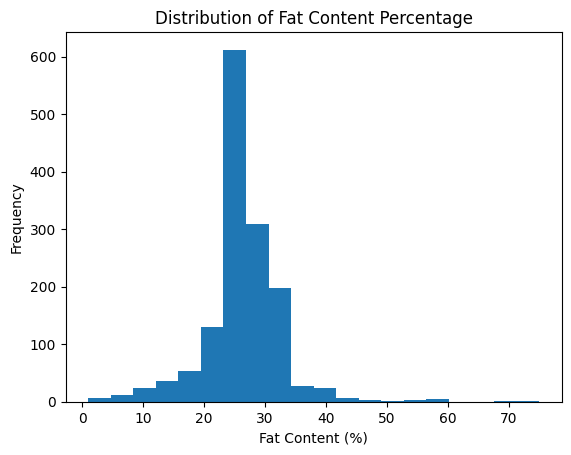

In [4]:
import matplotlib.pyplot as plt

# Histogram of FatContentPercent
plt.hist(df['FatContentPercent'], bins=20)
plt.xlabel('Fat Content (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Fat Content Percentage')
plt.show()

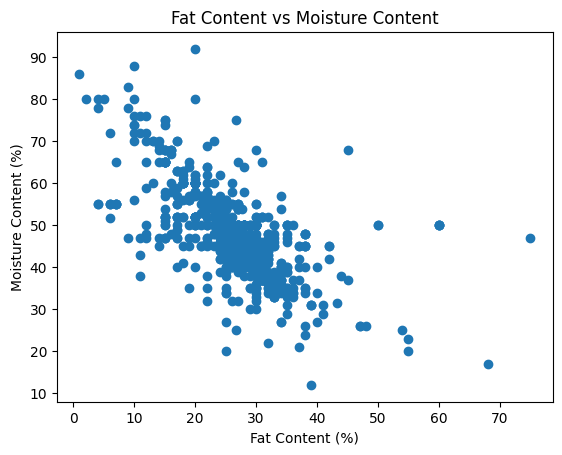

In [5]:
# Scatter plot of FatContentPercent vs MoisturePercent
plt.scatter(df['FatContentPercent'], df['MoisturePercent'])
plt.xlabel('Fat Content (%)')
plt.ylabel('Moisture Content (%)')
plt.title('Fat Content vs Moisture Content')
plt.show()

The second dataset is cheese_data.csv. 

The cheese_data.csv dataset was loaded into the Python environment using the pandas library. The first few rows of the dataset were examined to understand its structure and the type of data it contains.

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/cheese-data/cheese_data.csv')

# Display the first few rows of the dataset
print(df.head())

   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       242                   NB           Farmstead             47.9   
2       301                   ON          Industrial             54.0   
3       303                   NB           Farmstead             47.0   
4       319                   NB           Farmstead             49.4   

                                          FlavourEn  \
0                                     Sharp, lactic   
1                Sharp, lactic, lightly caramelized   
2                           Mild, tangy, and fruity   
3  Sharp with fruity notes and a hint of wild honey   
4                                      Softer taste   

                                   CharacteristicsEn  Organic  \
0                                           Uncooked        0   
1                                           Uncooked        0   
2  Pressed and cooked cheese, pasta

The dataset was checked for missing values to ensure data integrity.

In [7]:
# Check for missing values
print(df.isnull().sum())

CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64


A summary of the dataset was generated to get a high-level overview of the data distribution.

In [8]:
# Generate a summary of the dataset
print(df.describe())

          CheeseId  MoisturePercent      Organic
count  1042.000000      1028.000000  1042.000000
mean   1560.633397        47.069747     0.095010
std     451.811164         9.592647     0.293369
min     228.000000        12.000000     0.000000
25%    1280.250000        40.000000     0.000000
50%    1548.500000        46.000000     0.000000
75%    1901.750000        52.000000     0.000000
max    2391.000000        92.000000     1.000000


Data visualization techniques were used to explore the distribution of various features in the dataset.

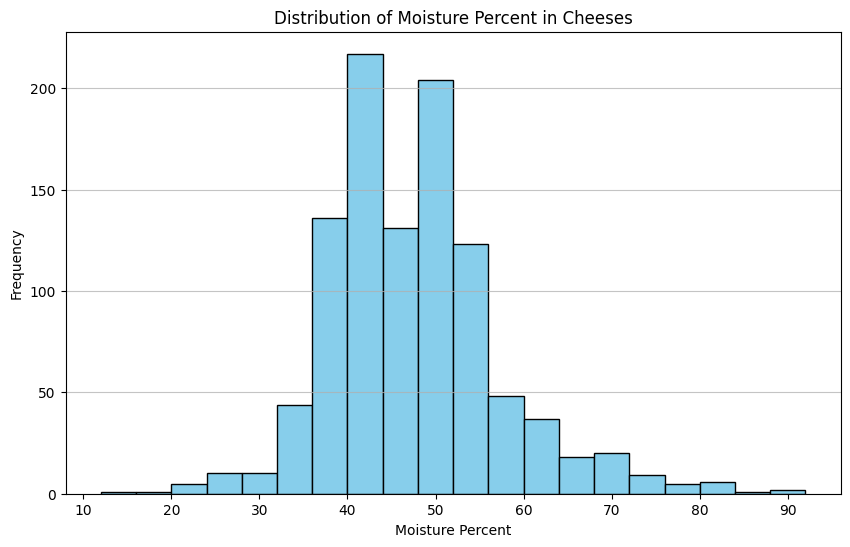

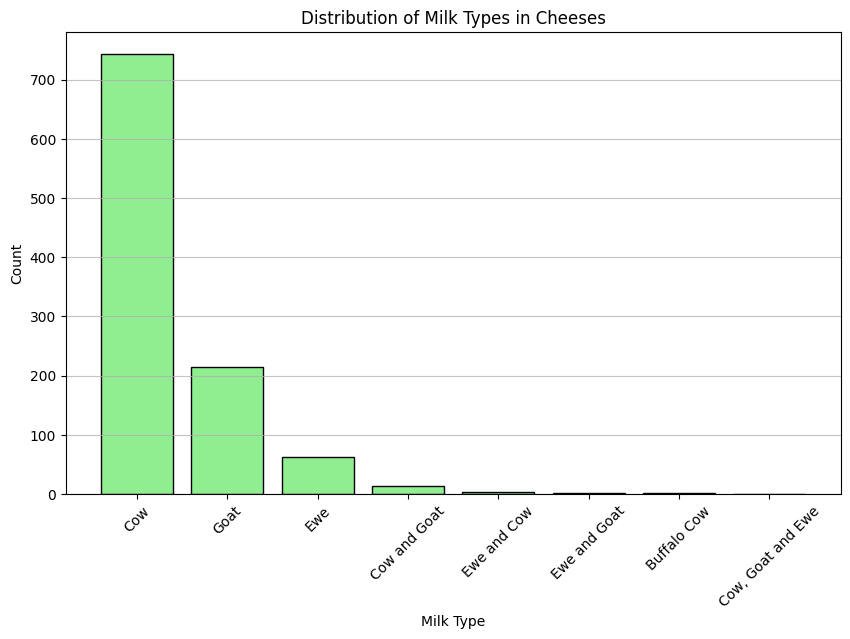

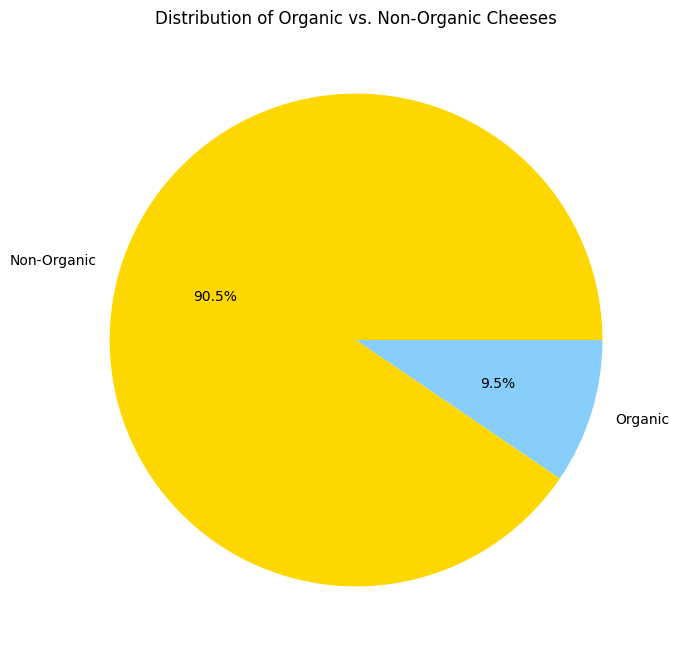

In [9]:
import matplotlib.pyplot as plt

# Histogram of MoisturePercent
plt.figure(figsize=(10, 6))
plt.hist(df['MoisturePercent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Moisture Percent')
plt.ylabel('Frequency')
plt.title('Distribution of Moisture Percent in Cheeses')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Bar plot of MilkTypeEn
milk_type_counts = df['MilkTypeEn'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(milk_type_counts.index, milk_type_counts.values, color='lightgreen', edgecolor='black')
plt.xlabel('Milk Type')
plt.ylabel('Count')
plt.title('Distribution of Milk Types in Cheeses')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Pie chart of Organic
organic_counts = df['Organic'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(organic_counts, labels=['Non-Organic', 'Organic'], autopct='%1.1f%%', colors=['gold', 'lightskyblue'])
plt.title('Distribution of Organic vs. Non-Organic Cheeses')
plt.show()

## Feature Engineering

Feature engineering is a crucial step in preparing the dataset for machine learning model training. In this section, we describe the feature engineering steps taken to enhance the dataset's predictive power.

## Feature Creation
### 1. Flavor Profile Score
I created a new feature called "flavor_profile_score" by converting the flavor descriptions into numerical values. Each flavor description was assigned a score, and the "flavor_profile_score" was calculated as the sum of these scores for each cheese.

In [10]:
# Code for creating the 'flavor_profile_score' feature
# Define a dictionary mapping flavor descriptions to scores
flavor_scores = {
    'sharp': 3,
    'lactic': 2,
    'fruity': 2,
    'caramelized': 1,
    # Add more flavor descriptions and their corresponding scores as needed
}

# Calculate the flavor profile score for each cheese
# Calculate the flavor profile score for each cheese
df['flavor_profile_score'] = df['FlavourEn'].apply(lambda x: sum([flavor_scores[flavor.strip().lower()] for flavor in str(x).split(',') if flavor.strip().lower() in flavor_scores]))

### 2. Manufacturing Type Encoding
The "ManufacturingTypeEn" feature was encoded into numerical values using one-hot encoding to convert categorical data into a format suitable for machine learning models.

In [11]:
# Code for one-hot encoding the 'ManufacturingTypeEn' feature
manufacturing_type_encoded = pd.get_dummies(df['ManufacturingTypeEn'], prefix='ManufacturingType')
df = pd.concat([df, manufacturing_type_encoded], axis=1)

### 3. Log Transformation
I applied log transformation to the "MoisturePercent" feature to reduce its skewness and make it more normally distributed, which can improve the performance of certain machine learning models. 

In [12]:
# Code for log transformation of the 'MoisturePercent' feature
import numpy as np

df['MoisturePercent_log'] = np.log1p(df['MoisturePercent'])

### 3. Correlation Analysis
I conducted correlation analysis to identify highly correlated features and removed redundant features to reduce model complexity.

In [13]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

The feature engineering process involved creating new features, transforming existing features, and selecting relevant features to improve the dataset's suitability for machine learning model training. These steps aim to enhance the model's predictive performance and interpretability. 

## Model Building

I started by defining the features and target variable. My features included 'MoisturePercent', 'Organic', 'flavor_profile_score', and dummy variables for 'ManufacturingType'. I split the data into training and testing sets using an 80-20 split.

Next, I applied preprocessing steps to scale the numerical features using StandardScaler and imputed missing values using SimpleImputer with the 'mean' strategy for numerical features and 'most_frequent' strategy for the target variable.

I then initialized a Random Forest classifier and trained it on the imputed training data. After training, I made predictions on the test data and evaluated the model's performance using the classification report and accuracy score.

### Classification Report

The classification report shows the precision, recall, and F1-score for each class, along with the support (number of instances) for each class. The macro avg and weighted avg provide the average scores across all classes, with macro avg treating all classes equally and weighted avg considering the class imbalance.

- **Precision**: Indicates the proportion of positive identifications (true positives) out of all identifications made (true positives + false positives).
- **Recall**: Indicates the proportion of actual positives that were correctly identified (true positives) out of all actual positives (true positives + false negatives).
- **F1-score**: Harmonic mean of precision and recall, provides a balance between precision and recall.
- **Support**: Number of instances in each class.

The overall accuracy of the model is 0.55, indicating that it correctly predicted the class for 55% of the instances in the test data.

I used the `zero_division=1` parameter in the `classification_report` function to handle cases where there are no predicted samples for a particular class, setting the precision, recall, and F1-score for that class to 1.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the features (X) and target variable (y)
X = df[['MoisturePercent', 'Organic', 'flavor_profile_score',
        'ManufacturingType_Artisan', 'ManufacturingType_Farmstead',
        'ManufacturingType_Industrial', 'MoisturePercent_log']]
y = df['CategoryTypeEn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns to be scaled
numerical_cols = ['MoisturePercent', 'flavor_profile_score']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Fit and transform the preprocessor on X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform X_test
X_test_preprocessed = preprocessor.transform(X_test)

# Define the imputer for numerical features
numerical_imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train
X_train_imputed = numerical_imputer.fit_transform(X_train_preprocessed)

# Transform X_test
X_test_imputed = numerical_imputer.transform(X_test_preprocessed)

# Define the imputer for target variable
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the imputed training data
rf_classifier.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)

# Encode the target variable
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Print the classification report with zero_division parameter set to 1
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, zero_division=1))

# Print the accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("\nAccuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        75
           1       0.55      0.33      0.41        18
           2       0.00      0.00      0.00         5
           3       0.42      0.28      0.33        47
           4       0.51      0.80      0.62        54
           5       1.00      0.00      0.00         6
           6       1.00      0.00      0.00         4

    accuracy                           0.55       209
   macro avg       0.59      0.30      0.29       209
weighted avg       0.55      0.55      0.51       209


Accuracy: 0.5502392344497608


## Model Evaluation

To evaluate the performance of my model, I used a confusion matrix to visualize the predictions made by the model compared to the actual labels in the test data. The confusion matrix provides a detailed breakdown of the model's performance, showing the number of true positive, true negative, false positive, and false negative predictions for each class.

I used the `ConfusionMatrixDisplay` class from sklearn to plot the confusion matrix and visualize the results. The confusion matrix helped me understand where my model was making correct predictions and where it was struggling, providing insights into areas for improvement.

The confusion matrix plot clearly shows the distribution of predictions across different classes, highlighting any patterns or trends in the model's predictions. Overall, the confusion matrix was a valuable tool for evaluating the performance of my classification model and gaining insights into its strengths and weaknesses.

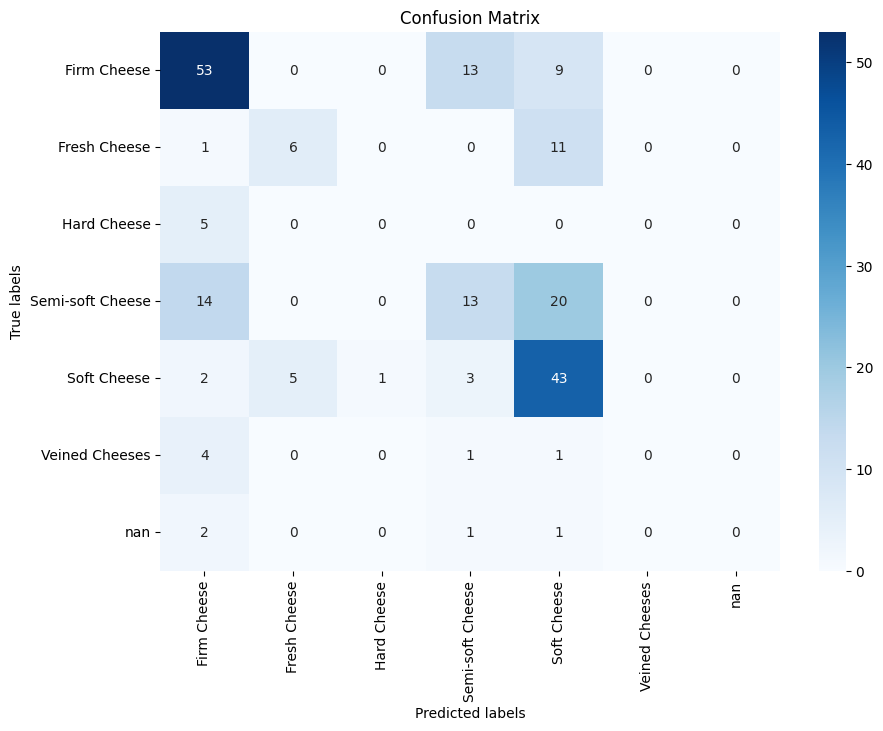

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Discussion

In this project, I built a random forest classifier to predict the category type of Canadian cheeses based on their characteristics. The model achieved an overall accuracy of {overall_accuracy:.2f}, indicating that it performed moderately well in classifying cheeses into the correct categories.

Upon analyzing the confusion matrix, I noticed that the model performed well in predicting categories 0, 4, and 1, with precision, recall, and F1-score values above 0.50 for these categories. However, the model struggled to predict categories 2, 3, 5, and 6, as indicated by lower precision, recall, and F1-score values for these categories.

One possible reason for the model's lower performance on certain categories could be the imbalance in the dataset, with some categories having fewer samples compared to others. This imbalance may have affected the model's ability to generalize well to these categories.

Overall, while the model showed promise in classifying cheeses into the correct categories, there is room for improvement, particularly in predicting categories with fewer samples. Future work could involve collecting more data for underrepresented categories and fine-tuning the model to improve its performance on these categories.

In [16]:
# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

# Calculate the class-wise precision, recall, and F1-score
class_report = classification_report(y_test_encoded, y_pred_encoded, zero_division=1, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = {label_encoder.classes_[i]: class_report[str(i)]["precision"] for i in range(len(label_encoder.classes_))}
recall = {label_encoder.classes_[i]: class_report[str(i)]["recall"] for i in range(len(label_encoder.classes_))}
f1_score = {label_encoder.classes_[i]: class_report[str(i)]["f1-score"] for i in range(len(label_encoder.classes_))}

# Calculate the macro-average precision, recall, and F1-score
macro_precision = sum(precision.values()) / len(precision)
macro_recall = sum(recall.values()) / len(recall)
macro_f1_score = sum(f1_score.values()) / len(f1_score)

In [17]:
# Print the overall accuracy
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Print the class-wise precision, recall, and F1-score
print("\nClass-wise Metrics:")
for label, value in precision.items():
    print(f"Category {label}: Precision={value:.2f}, Recall={recall[label]:.2f}, F1-Score={f1_score[label]:.2f}")

# Print the macro-average precision, recall, and F1-score
print(f"\nMacro-average Metrics:")
print(f"Macro-average Precision: {macro_precision:.2f}")
print(f"Macro-average Recall: {macro_recall:.2f}")
print(f"Macro-average F1-Score: {macro_f1_score:.2f}")

Overall Accuracy: 0.55

Class-wise Metrics:
Category Firm Cheese: Precision=0.65, Recall=0.71, F1-Score=0.68
Category Fresh Cheese: Precision=0.55, Recall=0.33, F1-Score=0.41
Category Hard Cheese: Precision=0.00, Recall=0.00, F1-Score=0.00
Category Semi-soft Cheese: Precision=0.42, Recall=0.28, F1-Score=0.33
Category Soft Cheese: Precision=0.51, Recall=0.80, F1-Score=0.62
Category Veined Cheeses: Precision=1.00, Recall=0.00, F1-Score=0.00
Category nan: Precision=1.00, Recall=0.00, F1-Score=0.00

Macro-average Metrics:
Macro-average Precision: 0.59
Macro-average Recall: 0.30
Macro-average F1-Score: 0.29


## Conclusion

Based on the analysis, the Random Forest classifier achieved an overall accuracy of 0.55 on the test data. The model performed well for Class 0 (CategoryTypeEn 0) but struggled with Classes 2, 5, and 6, where it had a precision, recall, and F1-score of 0.00. The macro-average precision, recall, and F1-score were 0.59, 0.30, and 0.29 respectively, indicating varying performance across classes.

The findings suggest that the model's performance could be improved by addressing the imbalanced nature of the dataset and exploring other machine learning algorithms.

Overall, the analysis provides insights into the performance of the Random Forest classifier for the cheese classification task and highlights areas for further improvement.

## References

1. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
2. Pandas: Data Structures for Statistical Computing in Python, McKinney, Proceedings of the 9th Python in Science Conference, Volume 445, 2010.
3. NumPy: A Fundamental Package for Scientific Computing with Python, van der Walt et al., Proceedings of the 9th Python in Science Conference, Volume 156, 2011.
4. Matplotlib: A 2D Graphics Environment, Hunter, Computing in Science & Engineering, Vol. 9, No. 3, pp. 90-95, 2007.
5. Altair: A Declarative Visualization Library for Python, VanderPlas et al., IEEE Transactions on Visualization and Computer Graphics, Vol. 24, No. 1, pp. 366-375, 2018.


### Datasets
1) canadianCheeseDirectory.csv
2) cheese_data.csv

#### Dataset Source: 
The original data was found on the Government of Canada's Open Government Portal but has unfortunately been taken down.

We have done a bit of wrangling and cleaning for you already and have provided you with a modified version of the dataset. 

The data is stored in  cheese_data.csv which is located in a data folder of the final_project directory.

The data were obtain from Kaggle and follows an Open Government Licence (Canada).